# Code to make Figure 10
- Decadal map composites over southern Ross Sea for near sea level pressure
- Notebook by Alice DuVivier (NCAR)
- June 2023

In [1]:
import pandas as pd
from minisom import MiniSom, asymptotic_decay
import xarray as xr
import cftime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cls
from itertools import product
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from datetime import timedelta
from itertools import product
import dask
import cmocean
import geopandas as gpd

## Set some details for region

In [2]:
# set the location of the already extracted training data
path_in = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/analysis/Ross_analysis_v5/'
path_out = path_in+'figure_code/final_figures/'
# set shape files info
fname= '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/analysis/Ross_analysis_v4/USNIC_ANTARC_shelf_2022/USNIC_ANTARC_shelf_2022.shp' 

In [3]:
fname

'/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/analysis/Ross_analysis_v4/USNIC_ANTARC_shelf_2022/USNIC_ANTARC_shelf_2022.shp'

### Specify variables to plot

In [4]:
# set path to the pulled data
# Note data is for larger area than only training points
# this data has been processed all the same 'time' coordinates as training data
data_path_in = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/DATA/data_for_composites/'

# set what variables we can plot
var_composite_in = 'PSL'


In [5]:
# file name for training variable only here 
fin_composite = 'antarctic_data_for_som_composites_'+var_composite_in+'_allSH'

In [6]:
# load data
ds = xr.open_mfdataset(data_path_in+fin_composite+'.nc')

In [7]:
ds

<xarray.Dataset>
Dimensions:    (lat: 74, lon: 288, training_times: 232300)
Coordinates:
    time       (training_times) object dask.array<chunksize=(232300,), meta=np.ndarray>
    member_id  (training_times) object dask.array<chunksize=(232300,), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat        (lat) float64 -89.06 -88.12 -87.17 -86.23 ... -22.15 -21.2 -20.26
Dimensions without coordinates: training_times
Data variables:
    data       (lat, lon, training_times) float32 dask.array<chunksize=(74, 288, 232300), meta=np.ndarray>
Attributes:
    Author:    Alice DuVivier
    units:     Pa
    longname:  Sea level pressure

In [8]:
ds.units

'Pa'

### Load in ice data

In [9]:
# set what variables we can plot
var_composite_in = 'aice_d' 
print(var_composite_in)

aice_d


In [10]:
# file name for training variable only here 
fin_composite = 'antarctic_data_for_som_composites_'+var_composite_in

In [11]:
# load data
ds_ice = xr.open_mfdataset(data_path_in+fin_composite+'.nc')

## Calculate the mean for all winter by decade

In [12]:
# calculate winter mean against which to do anomalies
mean_all = ds.data.mean(dim='training_times')
mean_all_ice = ds_ice.data.mean(dim='training_times')

In [13]:
decade_names = ['1980','1990', '2000', '2010', '2020', '2030', '2040', '2050', '2060', '2070']

In [14]:
# make numpy array to fill and specify dimensions we want
decade_array = np.zeros([len(decade_names),len(mean_all.lat),len(mean_all.lon)])

for dd in decade_names:
    print('decade: '+dd+'s')
    if dd == '1980':
        d_count = 0
        yy_st = 1980
    else: 
        d_count = d_count+1
        yy_st = yy_st + 10
    # get years for this decade
    yy_ed = yy_st + 10
    yy_all = list(range(yy_st,yy_ed,1))
    # get mean for this decade
    decade_array[d_count,:,:] = ds.data.isel(training_times=ds.time.dt.year.isin([yy_all])).mean(dim='training_times')


decade: 1980s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 1990s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2000s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2010s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2020s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2030s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2040s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2050s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2060s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2070s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [15]:
# make numpy array to fill and specify dimensions we want
decade_array_ice = np.zeros([len(decade_names),len(mean_all_ice.nj),len(mean_all_ice.ni)])

for dd in decade_names:
    print('decade: '+dd+'s')
    if dd == '1980':
        d_count = 0
        yy_st = 1980
    else: 
        d_count = d_count+1
        yy_st = yy_st + 10
    # get years for this decade
    yy_ed = yy_st + 10
    yy_all = list(range(yy_st,yy_ed,1))
    # get mean for this decade
    decade_array_ice[d_count,:,:] = ds_ice.data.isel(training_times=ds_ice.time.dt.year.isin([yy_all])).mean(dim='training_times')


decade: 1980s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 1990s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2000s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2010s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2020s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2030s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2040s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2050s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2060s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2070s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [16]:
print(decade_array.shape)
print(decade_array_ice.shape)

(10, 74, 288)
(10, 36, 320)


In [17]:
# convert the numpy array to a xarray for easier plotting
decade_means = xr.DataArray(decade_array,dims=('decade','lat','lon'))
decade_means_ice = xr.DataArray(decade_array_ice,dims=('decade','nj','ni'))

In [18]:
mean_all_ice

<xarray.DataArray 'data' (nj: 36, ni: 320)>
dask.array<mean_agg-aggregate, shape=(36, 320), dtype=float32, chunksize=(36, 320), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 dask.array<chunksize=(36, 320), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(36, 320), meta=np.ndarray>
  * nj       (nj) int64 0 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * ni       (ni) int64 0 1 2 3 4 5 6 7 8 ... 312 313 314 315 316 317 318 319

In [19]:
# set coordinate arrays
decade_means['decade'] = decade_names
decade_means['lat'] = mean_all['lat'].values
decade_means['lon'] = mean_all['lon'].values

decade_means_ice['decade'] = decade_names
decade_means_ice['nj'] = mean_all_ice['nj'].values
decade_means_ice['ni'] = mean_all_ice['ni'].values

## Make plots

In [20]:
# PSL details
title_in = 'Sea Level Pressure'
units = 'hPa'
levels_in = np.arange(960,1012,1)
cmap_in = cmocean.cm.tempo
cmap_in = cmap_in.reversed()
ticks_in = [970,980,990,1000,1010]

levels_diff = np.arange(-4,4.5,0.5) 
ticks_diff = [-4,-3,-2,-1,0,1,2,3,4]
cmap_diff = cmocean.cm.diff 

# ice details
levels_ice_diff = np.arange(-25,30,5)
ticks_ice_diff = [-20,-15,-10,-5,0,5,10,15,20]

In [21]:
# Based set plotting limits for zoom out
lat_max_big = -60
lat_min_big = -85
lon_max_big = 250
lon_min_big = 180
lon_avg_big = 210

In [22]:
#set shape files info
shdf = gpd.read_file(fname)
# This line is important. Here we convert the projection from the shapefile one to the cartopy one 
shdf = shdf.to_crs(ccrs.SouthPolarStereo())

# Shapefile projection conversion
shdf = gpd.read_file(fname)
shdf = shdf.to_crs(ccrs.SouthPolarStereo(central_longitude=lon_avg_big))


In [24]:
## 2070's difference figure
tag = '2070'
fout = path_out+'fig_10_PSL_'+tag+'_1980s'

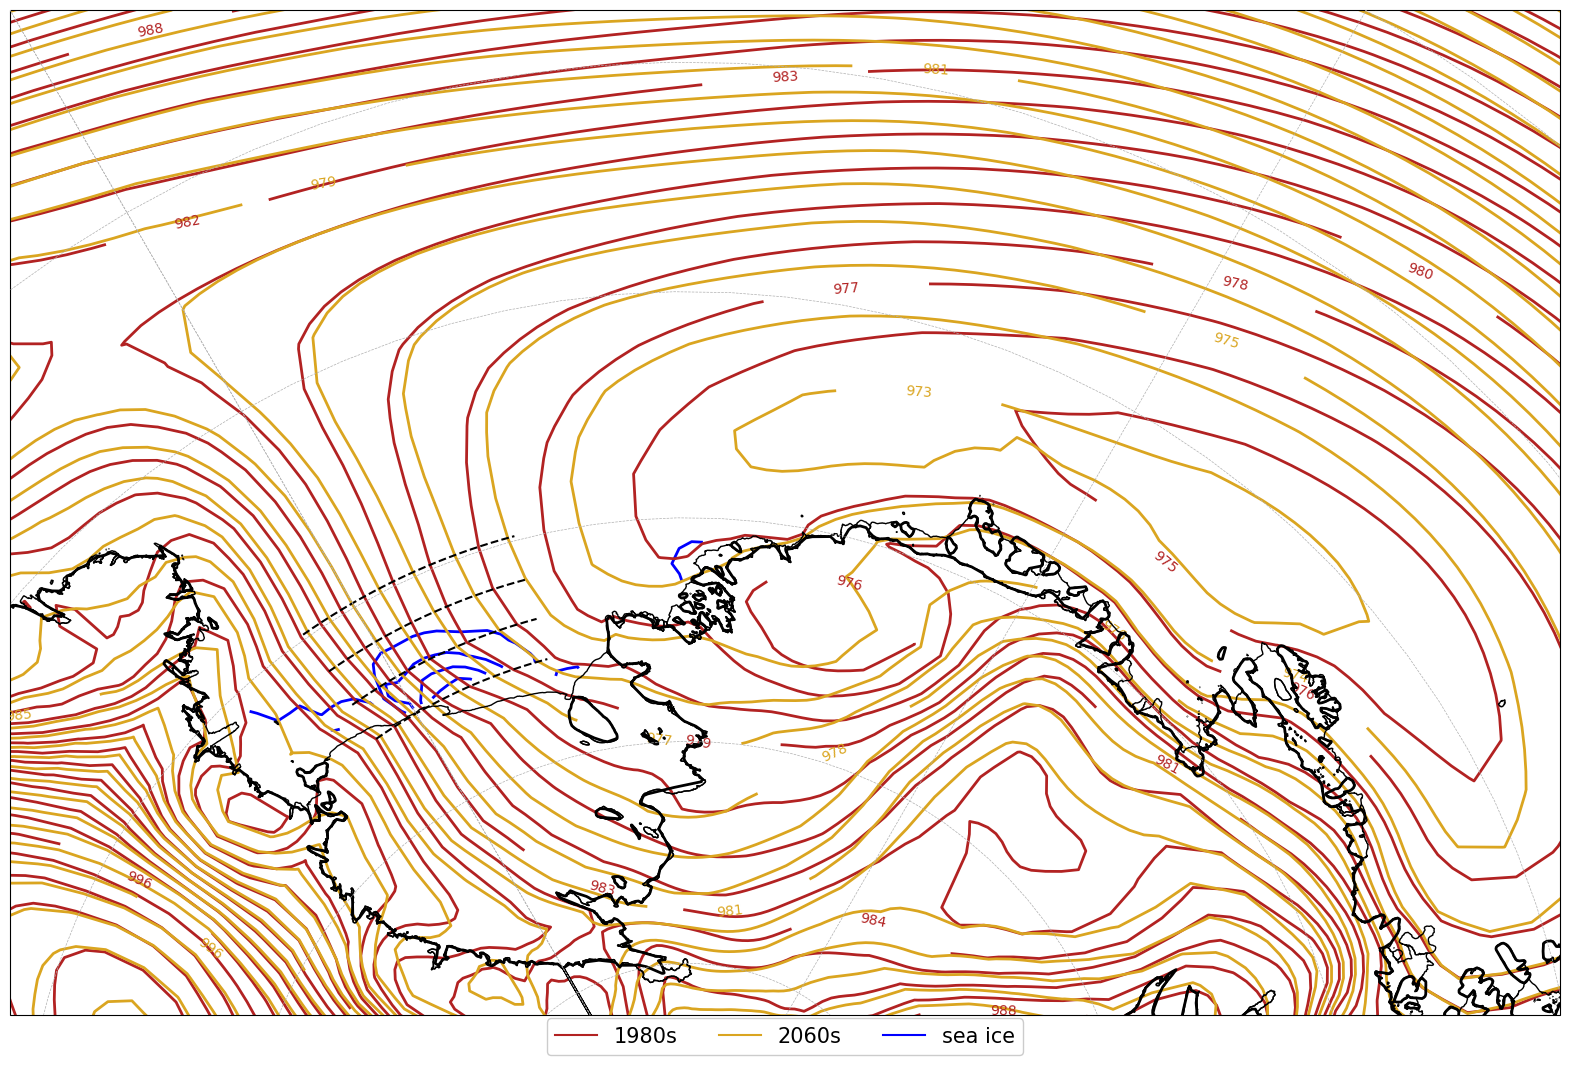

In [25]:
# select data
data_ctrl = decade_means.sel(decade='1980')/100
data_in = decade_means.sel(decade=tag)/100
data_diff = data_in - data_ctrl

# select ice data
data_ice_ctrl = 100*decade_means_ice.sel(decade='1980')
data_ice_in = 100*decade_means_ice.sel(decade=tag)
data_ice_diff = data_ice_in - data_ice_ctrl
# mask ice differences above 75S
data_ice_diff = data_ice_diff.where(ds_ice.TLAT <= -75)

# create figure
fig = plt.figure(figsize=(20,15))

# get lats/lons for plotting
lons = ds.lon
lats = ds.lat
lons_ice = ds_ice.TLON
lats_ice = ds_ice.TLAT

# plot the subplots - note it's nrow x ncol x index (starting upper left)

### contour overlay
ax = fig.add_subplot(1,1,1, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg_big) )
# add ice difference contours overtop
color = 'blue'
this1 = ax.contour(lons_ice,lats_ice,
                   data_ice_diff,
                   transform=ccrs.PlateCarree(),
                   colors = color,
                   levels=levels_ice_diff,extend='both',linewidths=2)
plt.clabel(this1,colors=color,inline=1,fontsize=20,levels=ticks_ice_diff)
#1980s
color = 'firebrick'
this2 = ax.contour(lons,lats,
                   data_ctrl,
                   transform=ccrs.PlateCarree(),
                   colors = color, levels = levels_in,linewidths=2)
plt.clabel(this2,colors=color,inline=1,fontsize=10,levels=levels_in)
# 2060s
color = 'goldenrod'
this3 = ax.contour(lons,lats,
                   data_in,
                   transform=ccrs.PlateCarree(),
                   colors = color, levels = levels_in,linewidths=2)
plt.clabel(this3,colors=color,inline=1,fontsize=10,levels=levels_in)
# Plotting shapefile
ax.add_geometries(shdf.geometry , ccrs.SouthPolarStereo(central_longitude=lon_avg_big), facecolor='none', edgecolor='black',linewidth=1, zorder=10)
# custom legend stuff
import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='firebrick', marker='None', linestyle='-',
                          markersize=10)
gold_line = mlines.Line2D([], [], color='goldenrod', marker='None', linestyle='-',
                          markersize=10)
blue_line = mlines.Line2D([], [], color='blue', marker='None', linestyle='-',
                          markersize=10)
ax.legend([red_line,gold_line,blue_line],['1980s','2060s','sea ice'],
          fancybox=True, fontsize=15, ncol=3,loc='lower center',framealpha=1,bbox_to_anchor=(0.5,-0.05)).set_zorder(102)

# set final plot details
ax.set_extent([lon_min_big,lon_max_big,lat_min_big,lat_max_big])
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none', linewidths=2)    
ax.gridlines(linestyle='--', linewidth=0.5, zorder=11)
# add some lines of latitude that correspond to CAM latitide values (see below)
ax.plot(np.arange(175, 195 + 1, 1),
        np.linspace(-77.74, -77.74, np.arange(175, 195 + 1, 1).shape[0]), 
        color='black', linestyle='dashed', transform=ccrs.Geodetic())

ax.plot(np.arange(175, 195 + 1, 1),
        np.linspace(-76.81, -76.81, np.arange(175, 195 + 1, 1).shape[0]), 
        color='black', linestyle='dashed', transform=ccrs.Geodetic())

ax.plot(np.arange(175, 195 + 1, 1),
        np.linspace(-75.9, -75.9, np.arange(175, 195 + 1, 1).shape[0]), 
        color='black', linestyle='dashed', transform=ccrs.PlateCarree())

ax.plot(np.arange(175, 195 + 1, 1),
        np.linspace(-74.9, -74.9, np.arange(175, 195 + 1, 1).shape[0]), 
        color='black', linestyle='dashed', transform=ccrs.PlateCarree())

# Finalize figure and save
fig = plt.savefig(fout+'.png', bbox_inches='tight', dpi=200)

## Calculate pressure gradients for four lines of longitude

In [26]:
## Grab just pressure for the lats and lons we're interested in
means_sub = decade_means.where((decade_means.lat < -74.0) & (decade_means.lat > -78.0) & (decade_means.lon >= 175) & (decade_means.lon <= 195), drop = True)

## convert from Pa to hPa
means_sub = means_sub/100

In [27]:
means_sub.lat

<xarray.DataArray 'lat' (lat: 4)>
array([-77.748691, -76.806283, -75.863874, -74.921466])
Coordinates:
  * lat      (lat) float64 -77.75 -76.81 -75.86 -74.92

In [28]:
means_sub.lon

<xarray.DataArray 'lon' (lon: 17)>
array([175.  , 176.25, 177.5 , 178.75, 180.  , 181.25, 182.5 , 183.75, 185.  ,
       186.25, 187.5 , 188.75, 190.  , 191.25, 192.5 , 193.75, 195.  ])
Coordinates:
  * lon      (lon) float64 175.0 176.2 177.5 178.8 ... 191.2 192.5 193.8 195.0

In [29]:
means_sub.decade

<xarray.DataArray 'decade' (decade: 10)>
array(['1980', '1990', '2000', '2010', '2020', '2030', '2040', '2050', '2060',
       '2070'], dtype='<U4')
Coordinates:
  * decade   (decade) <U4 '1980' '1990' '2000' '2010' ... '2050' '2060' '2070'

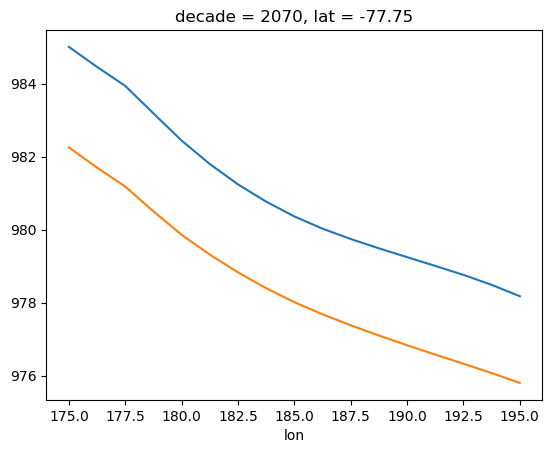

In [30]:
means_sub.sel(decade='1980').isel(lat=0).plot()
means_sub.sel(decade='2070').isel(lat=0).plot()

### Computing the dx

In [31]:
from math import radians, sin, cos, acos

def compute_distance(lat0, lon0, lat1, lon1):
    """
    Compute great circle distance across two lat/lon points (in degrees).
    """
    slat = radians(float(lat0))
    slon = radians(float(lon0))
    elat = radians(float(lat1))
    elon = radians(float(lon1))

    dist = 6371.01 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    print("The distance is %.2fkm." % dist)
    return dist

In [32]:
# compute distance for all the lines of latitude
ind = 0
print('At latitude '+str(means_sub.lat.isel(lat=ind)))
lons = means_sub.lon
lats = np.linspace(means_sub.lat.isel(lat=ind), means_sub.lat.isel(lat=ind), lons.shape[0])
compute_distance(lats[0], lons[0], lats[-1], lons[-1])

ind = 1
print('At latitude '+str(means_sub.lat.isel(lat=ind)))
lons = means_sub.lon
lats = np.linspace(means_sub.lat.isel(lat=ind), means_sub.lat.isel(lat=ind), lons.shape[0])
compute_distance(lats[0], lons[0], lats[-1], lons[-1])

ind = 2
print('At latitude '+str(means_sub.lat.isel(lat=ind)))
lons = means_sub.lon
lats = np.linspace(means_sub.lat.isel(lat=ind), means_sub.lat.isel(lat=ind), lons.shape[0])
compute_distance(lats[0], lons[0], lats[-1], lons[-1])

ind = 3
print('At latitude '+str(means_sub.lat.isel(lat=ind)))
lons = means_sub.lon
lats = np.linspace(means_sub.lat.isel(lat=ind), means_sub.lat.isel(lat=ind), lons.shape[0])
compute_distance(lats[0], lons[0], lats[-1], lons[-1])


At latitude <xarray.DataArray 'lat' ()>
array(-77.7486911)
Coordinates:
    lat      float64 -77.75
The distance is 469.63km.
At latitude <xarray.DataArray 'lat' ()>
array(-76.80628272)
Coordinates:
    lat      float64 -76.81
The distance is 505.15km.
At latitude <xarray.DataArray 'lat' ()>
array(-75.86387435)
Coordinates:
    lat      float64 -75.86
The distance is 540.54km.
At latitude <xarray.DataArray 'lat' ()>
array(-74.92146597)
Coordinates:
    lat      float64 -74.92
The distance is 575.80km.


575.7952742514894

### Calculate pressure difference over latitude lines

In [33]:
## calcuate difference in Pressure across lines of latitude
dp_1980s = means_sub.sel(decade='1980').isel(lon=0) - means_sub.sel(decade='1980').isel(lon=16)
dp_2070s = means_sub.sel(decade='2070').isel(lon=0) - means_sub.sel(decade='2070').isel(lon=16)

In [34]:
# print values
print('1980s gradient')
print(dp_1980s.values)
print('2070s gradient')
print(dp_2070s.values)

1980s gradient
[6.82796875 6.59796875 6.56171875 6.45421875]
2070s gradient
[6.4503125  6.25554688 6.32796875 6.31648437]


In [35]:
# print change in pressure gradients
print('Differences from 1980s gradient')
print('2070s')
print(dp_2070s.values - dp_1980s.values)

Differences from 1980s gradient
2070s
[-0.37765625 -0.34242188 -0.23375    -0.13773438]


## Plot whole SH for supplementary figure

In [36]:
## 2070's difference figure
tag = '2070'
fout = path_out+'supp_fig_PSL_'+tag+'_1980s'

In [37]:
# Based set plotting limits for zoom out
lat_max_big = -50
lat_min_big = -90
lon_max_big = 360
lon_min_big = 0.005
lon_avg_big = 180

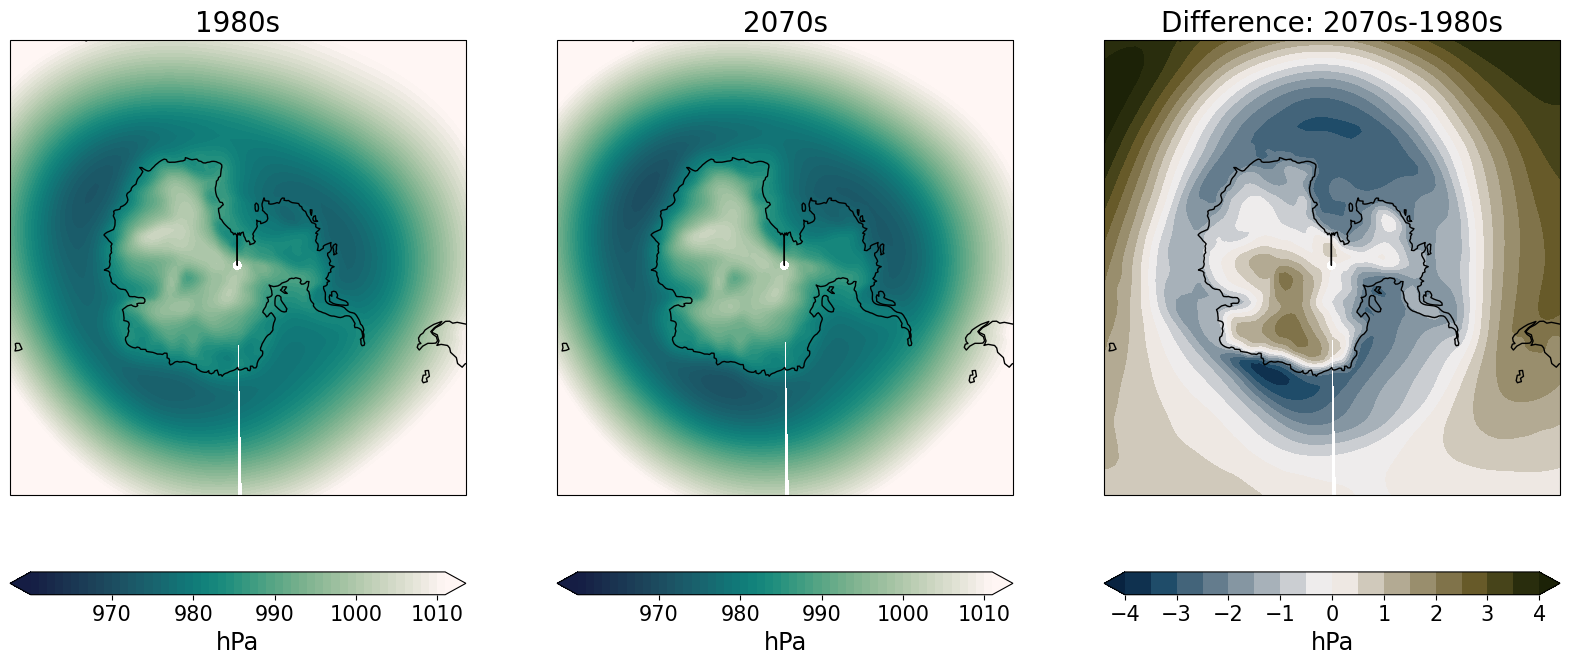

In [38]:
# select data
data_ctrl = decade_means.sel(decade='1980')/100
data_in = decade_means.sel(decade=tag)/100
data_diff = data_in - data_ctrl

# create figure
fig = plt.figure(figsize=(20,20))

# get lats/lons for plotting
lons = ds.lon
lats = ds.lat

# plot the subplots - note it's nrow x ncol x index (starting upper left)

### mean over 1980s
ax = fig.add_subplot(1,3,1, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg_big) )
this = ax.contourf(lons,lats,
                   data_ctrl,
                   transform=ccrs.PlateCarree(),
                   cmap = cmap_in,
                   levels=levels_in, extend='both')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_in,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# set final plot details
ax.set_extent([lon_min_big,lon_max_big,lat_min_big,lat_max_big], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
plt.title('1980s',fontsize=20)

### mean future
ax = fig.add_subplot(1,3,2, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg_big) )
this = ax.contourf(lons,lats,
                   data_in,
                   transform=ccrs.PlateCarree(),
                   cmap = cmap_in,
                   levels=levels_in, extend='both')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_in,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# set final plot details
ax.set_extent([lon_min_big,lon_max_big,lat_min_big,lat_max_big], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
plt.title(tag+'s',fontsize=20)

### diff
ax = fig.add_subplot(1,3,3, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg_big) )
this = ax.contourf(lons,lats,
                     data_diff,
                     transform=ccrs.PlateCarree(),
                     cmap = cmap_diff,
                     levels=levels_diff, extend='both')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_diff,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# set final plot details
ax.set_extent([lon_min_big,lon_max_big,lat_min_big,lat_max_big], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
plt.title('Difference: '+tag+'s-1980s',fontsize=20)

# Finalize figure and save
fig = plt.savefig(fout+'.png', bbox_inches='tight', dpi=200)